# KNN으로 포지션 예측하기

In [28]:
# Random 값을 정하기
import numpy as np

In [29]:
import pandas as pd

In [30]:
train = pd.read_csv('../data/basketball_train.csv')
train.head()

,Player,Pos,3P,TRB,BLK
0,A.J. Hammons,C,0.2,1.6,0.6
1,Tim Hardaway,SG,1.9,2.8,0.2
2,Zach LaVine,SG,2.6,3.4,0.2
3,Victor Oladipo,SG,1.9,4.3,0.3
4,Patrick Beverley,SG,1.6,5.9,0.4


In [31]:
test = pd.read_csv('../data/basketball_test.csv')
test.head()

,Player,Pos,3P,TRB,BLK
0,Tarik Black,C,0.0,5.1,0.7
1,Joel Embiid,C,1.2,7.8,2.5
2,Roy Hibbert,C,0.0,3.2,1.0
3,Justin Hamilton,C,0.9,4.1,0.7
4,Pau Gasol,C,0.9,7.8,1.1


In [32]:
print(train.shape, train.count())

(80, 5) Player    80
Pos       80
3P        80
TRB       80
BLK       80
dtype: int64


In [33]:
print(test.shape, test.count())

(20, 5) Player    20
Pos       20
3P        20
TRB       20
BLK       20
dtype: int64


In [34]:
train.isnull().sum()

Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64

In [35]:
test.isnull().sum()

Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64

### 최적의 k 찾기(교차검증:cross validation)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score # 교차검증

In [37]:
# 최적의 k를 찾기 위해 교차검증을 수행할 k의 범위를 3부터 학습데이터의 절반까지 설정
max_k_range = train.shape[0] // 2
max_k_range

40

In [38]:
# 최적의 k를 찾기 위한 범위 확인 : 3~40
k_list = []

for i in range(3, max_k_range, 2):
    k_list.append(i)
k_list

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [39]:
# 점수 및 Train Data 정의
x_train = train[['3P','BLK','TRB']]
y_train = train['Pos']

print(x_train.head(), y_train.head())

    3P  BLK  TRB
0  0.2  0.6  1.6
1  1.9  0.2  2.8
2  2.6  0.2  3.4
3  1.9  0.3  4.3
4  1.6  0.4  5.9 0     C
1    SG
2    SG
3    SG
4    SG
Name: Pos, dtype: object


In [45]:
# 교차검증(10-fold)을 각 k를 대상으로 수행해 검증결과를 저장
cross_validation_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn,
        x_train,
        y_train,
        cv=10, # cross validation 10번 실행
        scoring='accuracy', # 점수 기준 정확도
    ) # scores는 기본적으로 numpy.ndarray 형태
    cross_validation_scores.append(scores.mean())
cross_validation_scores

[0.9,
 0.875,
 0.8875,
 0.8875,
 0.8875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.8625,
 0.8625,
 0.8625,
 0.8625,
 0.85,
 0.85,
 0.8375,
 0.8375,
 0.8375,
 0.8125]

In [41]:
type(scores)

numpy.ndarray

In [42]:
# k에 따른 정확도를 시각화
import matplotlib.pyplot as plt

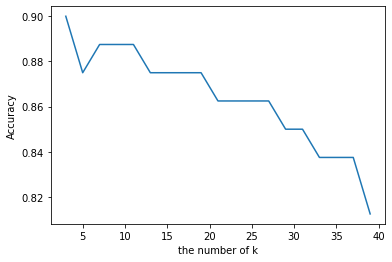

In [43]:
plt.plot(k_list, cross_validation_scores)

plt.xlabel('the number of k')
plt.ylabel('Accuracy')

plt.show()

> k = 3 일 때 최대

In [44]:
# 가장 예측율이 높은 k를 선정
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))] # index(검색 조건)
print('The beest number of k is', k)

The beest number of k is 3


---
### 2개의 특징으로 예측하기 : 3점슛, 블로킹

In [47]:
knn = KNeighborsClassifier(n_neighbors=k)
x_train = train[['3P','BLK']]
x_train.head()

,3P,BLK
0,0.2,0.6
1,1.9,0.2
2,2.6,0.2
3,1.9,0.3
4,1.6,0.4


In [48]:
# 학습에 사용할 target
y_train=train['Pos']
y_train.head()

0     C
1    SG
2    SG
3    SG
4    SG
Name: Pos, dtype: object

In [49]:
# 학습시키기
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=39)

In [50]:
# 검증에 사용할 features
x_test = test[['3P','BLK']]

In [51]:
# 검증의 정답
y_test = test['Pos']

In [52]:
knn.score(x_test, y_test)

0.95

In [53]:
# 예측
pred = knn.predict(x_test)
pred

array(['C', 'C', 'C', 'SG', 'C', 'C', 'SG', 'C', 'SG', 'SG', 'C', 'SG',
       'C', 'SG', 'C', 'SG', 'C', 'C', 'SG', 'C'], dtype=object)

In [54]:
# 실제값과 예측값의 비교
comparison = pd.DataFrame(
    {
        '예측값':pred,
        '정답':y_test,
    }
)

In [57]:
comparison

,예측값,정답
0,C,C
1,C,C
2,C,C
3,SG,C
4,C,C
5,C,C
6,SG,SG
7,C,C
8,SG,SG
9,SG,SG


### Confusion matrix

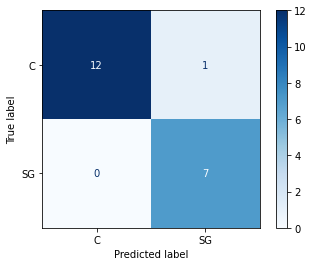

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred)
# 이쁘게 출력해보자
target_names = ['C','SG']
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=target_names,
)

disp.plot(
    cmap=plt.cm.Blues,
    xticks_rotation=0,
)

plt.show()

---
### 3개의 특징으로 예측하기(3점슛, 블로킹, 리바운드)

In [70]:
x_train = train[['3P','BLK','TRB']]
x_train.head()

,3P,BLK,TRB
0,0.2,0.6,1.6
1,1.9,0.2,2.8
2,2.6,0.2,3.4
3,1.9,0.3,4.3
4,1.6,0.4,5.9


In [75]:
y_train.head()

0     C
1    SG
2    SG
3    SG
4    SG
Name: Pos, dtype: object

In [72]:
x_test = test[['3P','BLK','TRB']]
x_test.head()

,3P,BLK,TRB
0,0.0,0.7,5.1
1,1.2,2.5,7.8
2,0.0,1.0,3.2
3,0.9,0.7,4.1
4,0.9,1.1,7.8


In [74]:
y_test.head()

0    C
1    C
2    C
3    C
4    C
Name: Pos, dtype: object

In [76]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=39)

In [77]:
knn.score(x_test, y_test)

0.75

In [78]:
# 예측
pred = knn.predict(x_test)
pred

array(['C', 'C', 'SG', 'SG', 'C', 'C', 'SG', 'C', 'SG', 'C', 'SG', 'SG',
       'C', 'SG', 'SG', 'SG', 'C', 'C', 'SG', 'C'], dtype=object)

In [81]:
# 실제값과 예측값의 비교
comparison = pd.DataFrame(
    {
        '예측값':pred,
        '정답':y_test,
    }
)
comparison

,예측값,정답
0,C,C
1,C,C
2,SG,C
3,SG,C
4,C,C
5,C,C
6,SG,SG
7,C,C
8,SG,SG
9,C,SG


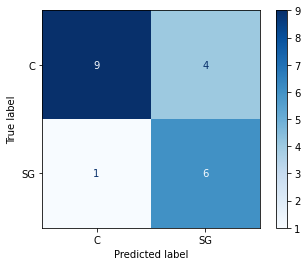

In [79]:
cm = confusion_matrix(y_test, pred)
# 이쁘게 출력해보자
target_names = ['C','SG']
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=target_names,
)

disp.plot(
    cmap=plt.cm.Blues,
    xticks_rotation=0,
)

plt.show()

3P : 3.4   
BLK : 0.5   
TRB : 3.7   

In [82]:
x = [3.4, 0.5, 3.7]
# 예측
pred = knn.predict([x])
pred

array(['SG'], dtype=object)